### Stochastic Gradient Descent

The main problem with batch gradient descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, stochastic gradient descent picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously, working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than batch gradient descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down

When the cost function is very irregular this can actually help the algorithm jump out of local minima, so stochastic gradient descent has a better chance of finding the global minimum than batch gradient descent does. Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to simulated annealing, an algorithm inspired by the process in metallurgy of annealing, where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. 

If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

#### Data

In [1]:
import numpy as np

np.random.seed(42)
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # add x0 = 1 to each instance

#### Stochastic gradient descent

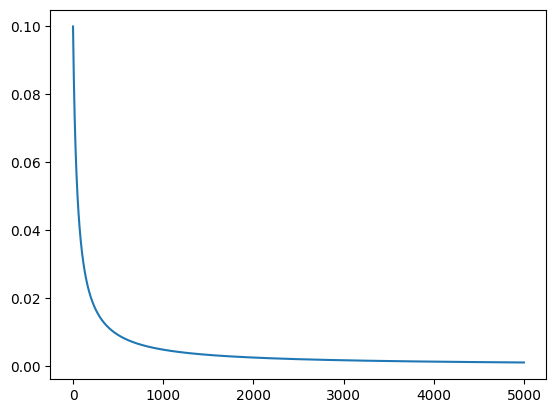

In [9]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

times = np.arange(n_epochs*m)
learn = learning_schedule(times)

from matplotlib import pyplot as plt
plt.plot(times, learn)
plt.show()

In [7]:
np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for Stochoastic Gradient Descent, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [8]:
theta

array([[4.21076011],
       [2.74856079]])

To perform linear regression using stochastic GD with Scikit-Learn, you can use the [SGDRegressor](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDRegressor.html) class, which defaults to optimizing the MSE cost function.



In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42, verbose=1)
sgd_reg.fit(X, y.ravel()) # y.ravel() converts y to a 1D array - because fit() expects a 1D array
sgd_reg.intercept_, sgd_reg.coef_

-- Epoch 1
Norm: 2.09, NNZs: 1, Bias: 1.926787, T: 100, Avg. loss: 10.859753
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.73, NNZs: 1, Bias: 2.571937, T: 200, Avg. loss: 2.988374
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.03, NNZs: 1, Bias: 2.913810, T: 300, Avg. loss: 1.323002
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.20, NNZs: 1, Bias: 3.116882, T: 400, Avg. loss: 0.803563
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.28, NNZs: 1, Bias: 3.243845, T: 500, Avg. loss: 0.617674
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.33, NNZs: 1, Bias: 3.333870, T: 600, Avg. loss: 0.544225
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.35, NNZs: 1, Bias: 3.399411, T: 700, Avg. loss: 0.510118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 3.36, NNZs: 1, Bias: 3.446255, T: 800, Avg. loss: 0.494306
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 3.35, NNZs: 1, Bias: 3.482708, T: 900, Avg. loss: 0.485072
Total training time: 0.00 seconds.


(array([4.21278812]), array([2.77270267]))

#### Tip

All Scikit-Learn estimators can be trained using the fit() method, but some estimators also have a partial_fit() method that you can call to run a single round of training on one or more instances (it ignores hyperparameters like max_iter or tol). Repeatedly calling partial_fit() will gradually train the model. This is useful when you need more control over the training process. Other models have a warm_start hyperparameter instead (and some have both): if you set warm_start=True, calling the fit() method on a trained model will not reset the model; it will just continue training where it left off, respecting hyperparameters like max_iter and tol. Note that fit() resets the iteration counter used by the learning schedule, while partial_fit() does not.